<a href="https://colab.research.google.com/github/Kappness/KAPPNESS/blob/main/bandit-homework1_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center>
    
    COMP4240/5435 - Reinforcement Learning
    
# Homework 1 - K-armed Bandit Algorithms
    
</center>

Student name: _____________________

The purpose of this homework is to study different properties of multi-armed bandit algorithms.

In [ ]:
# You are only allowed to use the following modules
import numpy as np
import matplotlib.pyplot as plt


**General Notes:**
- Do not use a mix of python lists and numpy arrays. Every vector or matrix in your code should be a numpy array.
- For functions that exist in both the python core and the numpy library, use the one in the numpy library. For example, use `np.max` instead of `max`. Another example: use `np.random.normal` instead of `random.gauss`.
- Make sure all of your plots have a proper size and include `xlabel`, `ylabel`, `legend`, `title`, and `grid`.

### Part 1 - Bandit Class [20 pts]
(a) Implement a bandit class, by completing the following code. This class should at least have two functions, one for returning the number of arms, and the other for pulling a given arm and returning a reward.

In [ ]:
# this is your Bandit class. Complete the code.
class Bandit:
    def __init__(self, means, sigmas) -> None:
        self.means = means
        self.sigmas = sigmas

    def K(self):
        #--- Your code here ---#
        # complete the function to return number of arms
        pass

    def pull(self, k):
        #--- Your code here ---#
        # complete the function to return a reward for the selected arm
        # using a normal distribution with the given mean and sigma
        pass

In [2]:
import random
import numpy as np

class Bandit:
    def __init__(self, means, sigmas) -> None:
        self.means = means
        self.sigmas = sigmas

    def K(self):
        # Return the number of arms
        return len(self.means)
        pass
    def pull(self, k):
        # Pull arm k and return a reward sampled from a normal distribution
        if k < 0 or k >= len(self.means):
            raise ValueError("Invalid arm index")
        pass
        mean = self.means[k]
        sigma = self.sigmas[k]
        reward = np.random.normal(mean, sigma)
        return reward

# Example usage:
if __name__ == "__main__":
    bandit = Bandit([1.0, 2.0, 3.0], [0.5, 0.5, 0.5])  # Replace with your desired means and sigmas
    num_arms = bandit.K()
    arm_to_pull = random.randint(0, num_arms - 1)
    reward = bandit.pull(arm_to_pull)
    print(f"Pulled arm {arm_to_pull}, received reward: {reward}")


Pulled arm 1, received reward: 2.8519269444037403


(b) Test your Bandit class on a 2-armed bandit with true arm values [-1, 1] (i.e. means) and variance of 1.0. Instantiate your Bandit class and use it to get the number of arms, $K$. Then pull the first arm 1000 times and report the mean of the total reward you received.

In [3]:
if __name__ == "__main__":
    # Define the true arm values and variance
    true_means = [-1, 1]
    true_sigmas = [1.0, 1.0]

    # Create a Bandit instance
    bandit = Bandit(true_means, true_sigmas)

    # Get the number of arms (K)
    num_arms = bandit.K()
    print(f"Number of arms (K): {num_arms}")

    # Pull the first arm 1000 times and calculate the mean reward
    arm_to_pull = 0  # Index of the first arm
    num_pulls = 1000
    total_reward = 0

    for _ in range(num_pulls):
        reward = bandit.pull(arm_to_pull)
        total_reward += reward

    mean_reward = total_reward / num_pulls
    print(f"Mean reward after {num_pulls} pulls of arm {arm_to_pull}: {mean_reward}")


Number of arms (K): 2
Mean reward after 1000 pulls of arm 0: -0.9827624375812133


### Part 2 - Policy Class [40 pts]

(a) Make a *random* policy class that selects arms randomly using the following template. Your class should have: (i) a reset function for resetting the estimations, $Q$ and the number of times each arm was selected $N$, (ii) a function for selecting an arm using the current estimate $Q$, (iii) and a function that updates the estimate $Q$ according to the incremental averaging method.

In [5]:
import random

class RandomPolicy:
    def __init__(self, K) -> None:
        self.K = K
        self.reset()

    def reset(self):
        # Initialize/reset estimates N and Q
        self.N = [0] * self.K  # Number of times each arm has been chosen
        self.Q = [0.0] * self.K  # Estimated values (rewards) of each arm

    def choose_arm(self, t):
        # Choose an arm randomly
        chosen_arm = random.randint(0, self.K - 1)
        return chosen_arm

    def update_estimate(self, k, r):
        # Update estimates for Q and N using incremental averaging
        # k is the chosen arm, and r is the reward received
        self.N[k] += 1
        self.Q[k] += (r - self.Q[k]) / self.N[k]




(b) Similarly, implement a *UCB* policy class. Compared to the random policy class, the only difference would be in the arm selection strategy where you should use the UCB strategy.

In [ ]:
class UCBPolicy:
    pass


In [6]:
import math

class UCBPolicy:
    def __init__(self, K, c) -> None:
        self.K = K  # Number of arms
        self.c = c  # Exploration parameter
        self.reset()

    def reset(self):
        # Initialize/reset estimates N, Q, and t
        self.N = [0] * self.K  # Number of times each arm has been chosen
        self.Q = [0.0] * self.K  # Estimated values (rewards) of each arm
        self.t = 0  # Time step

    def choose_arm(self):
        # Choose an arm using the UCB algorithm
        # t is the current time step
        t = self.t
        ucb_values = [self.Q[k] + self.c * math.sqrt(math.log(t + 1) / (self.N[k] + 1e-6)) for k in range(self.K)]
        chosen_arm = ucb_values.index(max(ucb_values))
        return chosen_arm

    def update_estimate(self, k, r):
        # Update estimates for Q and N
        self.N[k] += 1
        self.Q[k] += (r - self.Q[k]) / self.N[k]
        self.t += 1


(c) Similarly, implement an $\epsilon-$greedy policy class. The only difference would be in the arm selection strategy where you should use the $\epsilon-$greedy strategy.

In [ ]:
class EpsilonGreedyPolicy:
    pass

In [7]:
import random

class EpsilonGreedyPolicy:
    def __init__(self, K, epsilon) -> None:
        self.K = K  # Number of arms
        self.epsilon = epsilon  # Exploration parameter
        self.reset()

    def reset(self):
        # Initialize/reset estimates N and Q
        self.N = [0] * self.K  # Number of times each arm has been chosen
        self.Q = [0.0] * self.K  # Estimated values (rewards) of each arm

    def choose_arm(self):
        # Choose an arm using the epsilon-greedy algorithm
        if random.random() < self.epsilon:
            # Exploration: Choose a random arm with probability epsilon
            chosen_arm = random.randint(0, self.K - 1)
        else:
            # Exploitation: Choose the arm with the highest estimated value
            chosen_arm = self.Q.index(max(self.Q))
        return chosen_arm

    def update_estimate(self, k, r):
        # Update estimates for Q and N
        self.N[k] += 1
        self.Q[k] += (r - self.Q[k]) / self.N[k]


(d) Test your policy classes on a 2-armed bandit with means [0.1, 1] and variance 1.0. First write a function that plays a given bandit using a given policy for a certain number of time-steps and returns a reward history (a numpy array). Instantiate three policy classes you developed (random, ucb, and $\epsilon-$greedy). Then plot reward history for all three plays in one plot. Hint: this plot will look noisy.

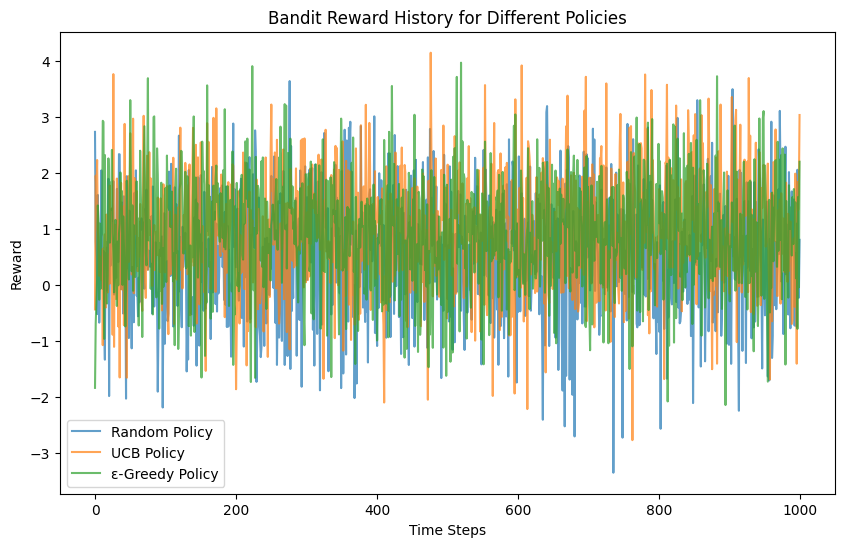

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Bandit class (as previously defined)
class Bandit:
    def __init__(self, means, sigmas) -> None:
        self.means = means
        self.sigmas = sigmas

    def K(self):
        return len(self.means)

    def pull(self, k):
        if k < 0 or k >= len(self.means):
            raise ValueError("Invalid arm index")

        mean = self.means[k]
        sigma = self.sigmas[k]
        reward = np.random.normal(mean, sigma)
        return reward

# RandomPolicy class (as previously defined)
import random

class RandomPolicy:
    def __init__(self, K) -> None:
        self.K = K
        self.reset()

    def reset(self):
        self.N = [0] * self.K
        self.Q = [0.0] * self.K

    def choose_arm(self):
        chosen_arm = random.randint(0, self.K - 1)
        return chosen_arm

    def update_estimate(self, k, r):
        self.N[k] += 1
        self.Q[k] += (r - self.Q[k]) / self.N[k]


# UCBPolicy class (as previously defined)
class UCBPolicy:
    def __init__(self, K, c) -> None:
        self.K = K
        self.c = c
        self.reset()

    def reset(self):
        self.N = [0] * self.K
        self.Q = [0.0] * self.K
        self.t = 0

    def choose_arm(self):
        t = self.t
        ucb_values = [self.Q[k] + self.c * np.sqrt(np.log(t + 1) / (self.N[k] + 1e-6)) for k in range(self.K)]
        chosen_arm = ucb_values.index(max(ucb_values))
        return chosen_arm

    def update_estimate(self, k, r):
        self.N[k] += 1
        self.Q[k] += (r - self.Q[k]) / self.N[k]
        self.t += 1

# EpsilonGreedyPolicy class (as previously defined)
class EpsilonGreedyPolicy:
    def __init__(self, K, epsilon) -> None:
        self.K = K
        self.epsilon = epsilon
        self.reset()

    def reset(self):
        self.N = [0] * self.K
        self.Q = [0.0] * self.K

    def choose_arm(self):
        if np.random.rand() < self.epsilon:
            chosen_arm = np.random.choice(self.K)
        else:
            chosen_arm = np.argmax(self.Q)
        return chosen_arm

    def update_estimate(self, k, r):
        self.N[k] += 1
        self.Q[k] += (r - self.Q[k]) / self.N[k]

# Function to play a given bandit using a given policy for a certain number of time-steps
def play(bandit, policy, ts):
    policy.reset()
    reward_history = np.empty(ts)
    for t in range(ts):
        chosen_arm = policy.choose_arm()
        reward = bandit.pull(chosen_arm)
        policy.update_estimate(chosen_arm, reward)
        reward_history[t] = reward
    return reward_history

# Define the bandit with means and variances
bandit = Bandit([0.1, 1], [1.0, 1.0])

# Number of time steps
ts = 1000

# Instantiate policy classes
random_policy = RandomPolicy(bandit.K())
ucb_policy = UCBPolicy(bandit.K(), c=2.0)  # You can adjust the exploration parameter 'c'
epsilon_greedy_policy = EpsilonGreedyPolicy(bandit.K(), epsilon=0.1)  # You can adjust epsilon

# Play the bandit with different policies
random_rewards = play(bandit, random_policy, ts)
ucb_rewards = play(bandit, ucb_policy, ts)
epsilon_greedy_rewards = play(bandit, epsilon_greedy_policy, ts)

# Plot the reward history for all three plays in one graph
plt.figure(figsize=(10, 6))
plt.plot(np.arange(ts), random_rewards, label="Random Policy", alpha=0.7)
plt.plot(np.arange(ts), ucb_rewards, label="UCB Policy", alpha=0.7)
plt.plot(np.arange(ts), epsilon_greedy_rewards, label="ε-Greedy Policy", alpha=0.7)
plt.xlabel("Time Steps")
plt.ylabel("Reward")
plt.legend()
plt.title("Bandit Reward History for Different Policies")
plt.show()


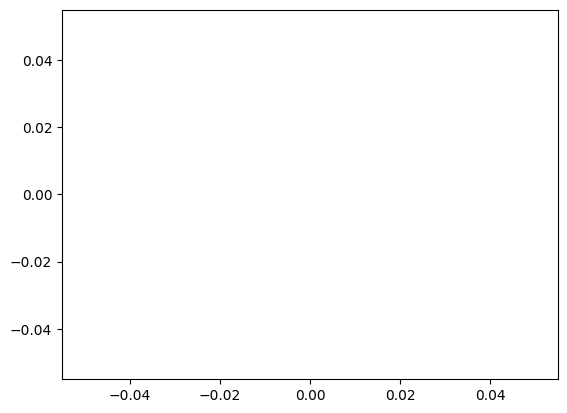

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# Bandit class (as previously defined)
class Bandit:
    def __init__(self, means, sigmas) -> None:
        self.means = means
        self.sigmas = sigmas

    def K(self):
        return len(self.means)

    def pull(self, k):
        if k < 0 or k >= len(self.means):
            raise ValueError("Invalid arm index")

        mean = self.means[k]
        sigma = self.sigmas[k]
        reward = np.random.normal(mean, sigma)
        return reward

# RandomPolicy class (as previously defined)
class RandomPolicy:
    def __init__(self, K) -> None:
        self.K = K
        self.reset()

    def reset(self):
        self.N = [0] * self.K
        self.Q = [0.0] * self.K

    def choose_arm(self):
        chosen_arm = np.random.choice(self.K)
        return chosen_arm

    def update_estimate(self, k, r):
        self.N[k] += 1
        self.Q[k] += (r - self.Q[k]) / self.N[k]

# UCBPolicy class (as previously defined)
class UCBPolicy:
    def __init__(self, K, c) -> None:
        self.K = K
        self.c = c
        self.reset()

    def reset(self):
        self.N = [0] * self.K
        self.Q = [0.0] * self.K
        self.t = 0

    def choose_arm(self):
        t = self.t
        ucb_values = [self.Q[k] + self.c * np.sqrt(np.log(t + 1) / (self.N[k] + 1e-6)) for k in range(self.K)]
        chosen_arm = ucb_values.index(max(ucb_values))
        return chosen_arm

    def update_estimate(self, k, r):
        self.N[k] += 1
        self.Q[k] += (r - self.Q[k]) / self.N[k]
        self.t += 1

# EpsilonGreedyPolicy class (as previously defined)
class EpsilonGreedyPolicy:
    def __init__(self, K, epsilon) -> None:
        self.K = K
        self.epsilon = epsilon
        self.reset()

    def reset(self):
        self.N = [0] * self.K
        self.Q = [0.0] * self.K

    def choose_arm(self):
        if np.random.rand() < self.epsilon:
            chosen_arm = np.random.choice(self.K)
        else:
            chosen_arm = np.argmax(self.Q)
        return chosen_arm

    def update_estimate(self, k, r):
        self.N[k] += 1
        self.Q[k] += (r - self.Q[k]) / self.N[k]

# Function to play a given bandit using a given policy for a certain number of time-steps
def play(bandit, policy, ts):
    policy.reset()
    reward_history = np.empty(ts)
    for t in range(ts):
        chosen_arm = policy.choose_arm()
        reward = bandit.pull(chosen_arm)
        policy.update_estimate(chosen_arm, reward)
        reward_history[t] = reward
    return reward_history

# Define the bandit with means and variances
bandit = Bandit([0.1, 1], [1.0, 1.0])

# Number of time steps
ts = 1000

# Instantiate policy classes
random_policy = RandomPolicy(bandit.K())
ucb_policy = UCBPolicy(bandit.K(), c=2.0)  # You can adjust the exploration parameter 'c'
epsilon_greedy_policy = EpsilonGreedyPolicy(bandit.K(), epsilon=0.1)  # You can adjust epsilon

# Play the bandit with different policies
random_rewards = play(bandit, random_policy, ts)
ucb_rewards = play(bandit, ucb_policy, ts)
epsilon_greedy_rewards = play(bandit, epsilon_greedy_policy, ts)


plt.plot(0,0)
plt.show()


### Part 3 - Testbed [40]

(a) build a testbed by generating 500 randomly selected 7-armed bandits. For each bandit problem, select the true arm value ($Q^*$) from a Gaussian distribution with mean 0.0 and variance 1.0. For each selected action $a$, the bandit should return an actual reward from a Gaussian distribution with mean $Q^*(a)$ and variance 1.0. Our goal is to evaluate the three policies that we developed by averaging their performance over the 500 bandit problems. In other words, using each policy, we play each generated 7-armed bandit for 1000 steps. Then for each policy, we average the results over the 500 generated 7-armed bandits.

Note that we refer to one run as playing a single bandit problem for a certain number of time steps. Therefore, in this case, one run includes 1000 time-steps.

You should get results for the following scenarios:

1. using random policy
2. using greedy policy
3. using $\epsilon-$greedy policy with $\epsilon=0.1$ and $\epsilon=0.01$
4. using upper-confidence bound policy with $c=1$ and $c=2$

For all the 6 scenarios, plot the average reward (averaged over the 500 different bandits).

In [ ]:
# Complete the following function

def generate_bandit(mean, sigma, num_arms):
    # this function generates the means of a k-armed bandit
    # using a specific distribution (in this case, N(0,1)
    # and returns the k-armed bandit means
    #--- Your code here ----#
    pass


# Implement the main testbed experiment
# 1- instantiate the 6 policies
# 2- in each run generate a new bandit means, use the means to instantiate a bandit class
# and play that bandit with all 6 policies and keep the results
# 3- repeat previous step, 500 times
# 4- average the results over the number of runs and plot the reward graphs in one plot
#--- Your code here ----#



In [22]:
import numpy as np
import matplotlib.pyplot as plt

# Bandit class (as previously defined)
class Bandit:
    def __init__(self, means, sigmas) -> None:
        self.means = means
        self.sigmas = sigmas

    def K(self):
        return len(self.means)

    def pull(self, k):
        if k < 0 or k >= len(self.means):
            raise ValueError("Invalid arm index")

        mean = self.means[k]
        sigma = self.sigmas[k]
        reward = np.random.normal(mean, sigma)
        return reward

# RandomPolicy class (as previously defined)
class RandomPolicy:
    def __init__(self, K) -> None:
        self.K = K
        self.reset()

    def reset(self):
        self.N = [0] * self.K
        self.Q = [0.0] * self.K

    def choose_arm(self):
        chosen_arm = np.random.choice(self.K)
        return chosen_arm

    def update_estimate(self, k, r):
        self.N[k] += 1
        self.Q[k] += (r - self.Q[k]) / self.N[k]

# UCBPolicy class (as previously defined)
class UCBPolicy:
    def __init__(self, K, c) -> None:
        self.K = K
        self.c = c
        self.reset()

    def reset(self):
        self.N = [0] * self.K
        self.Q = [0.0] * self.K
        self.t = 0

    def choose_arm(self):
        t = self.t
        ucb_values = [self.Q[k] + self.c * np.sqrt(np.log(t + 1) / (self.N[k] + 1e-6)) for k in range(self.K)]
        chosen_arm = ucb_values.index(max(ucb_values))
        return chosen_arm

    def update_estimate(self, k, r):
        self.N[k] += 1
        self.Q[k] += (r - self.Q[k]) / self.N[k]
        self.t += 1

# EpsilonGreedyPolicy class (as previously defined)
class EpsilonGreedyPolicy:
    def __init__(self, K, epsilon) -> None:
        self.K = K
        self.epsilon = epsilon
        self.reset()

    def reset(self):
        self.N = [0] * self.K
        self.Q = [0.0] * self.K

    def choose_arm(self):
        if np.random.rand() < self.epsilon:
            chosen_arm = np.random.choice(self.K)
        else:
            chosen_arm = np.argmax(self.Q)
        return chosen_arm

    def update_estimate(self, k, r):
        self.N[k] += 1
        self.Q[k] += (r - self.Q[k]) / self.N[k]

# Function to generate a k-armed bandit with random means
def generate_bandit(mean, sigma, num_arms):
    bandit_means = np.random.normal(mean, sigma, num_arms)
    bandit_sigmas = np.ones(num_arms)  # All arms have variance 1.0
    return Bandit(bandit_means, bandit_sigmas)

# Function to run the testbed experiment
def run_testbed(num_bandits, num_runs, num_steps):
    # Initialize policies
    random_policy = RandomPolicy(7)
    greedy_policy = EpsilonGreedyPolicy(7, epsilon=0.0)
    epsilon_greedy_0_1_policy = EpsilonGreedyPolicy(7, epsilon=0.1)
    epsilon_greedy_0_01_policy = EpsilonGreedyPolicy(7, epsilon=0.01)
    ucb_1_policy = UCBPolicy(7, c=1.0)
    ucb_2_policy = UCBPolicy(7, c=2.0)

    # Initialize arrays to store results
    average_rewards = np.zeros((6, num_runs, num_steps))

    for i in range(num_bandits):
        # Generate a new bandit problem with random means
        bandit = generate_bandit(mean=0.0, sigma=1.0, num_arms=7)

        for run in range(num_runs):
            # Play the bandit with each policy and store results
            random_rewards = play(bandit, random_policy, num_steps)
            greedy_rewards = play(bandit, greedy_policy, num_steps)
            epsilon_greedy_0_1_rewards = play(bandit, epsilon_greedy_0_1_policy, num_steps)
            epsilon_greedy_0_01_rewards = play(bandit, epsilon_greedy_0_01_policy, num_steps)
            ucb_1_rewards = play(bandit, ucb_1_policy, num_steps)
            ucb_2_rewards = play(bandit, ucb_2_policy, num_steps)

            # Store the rewards in the results array
            average_rewards[0, run, :] = random_rewards
            average_rewards[1, run, :] = greedy_rewards
            average_rewards[2, run, :] = epsilon_greedy_0_1_rewards
            average_rewards[3, run, :] = epsilon_greedy_0_01_rewards
            average_rewards[4, run, :] = ucb_1_rewards
            average_rewards[5, run, :] = ucb_2_rewards

    # Calculate average rewards over runs for each policy
    avg_random_rewards = np.mean(average_rewards[0, :, :], axis=0)
    avg_greedy_rewards = np.mean(average_rewards[1, :, :], axis=0)
    avg_epsilon_0_1_rewards = np.mean(average_rewards[2, :, :], axis=0)
    avg_epsilon_0_01_rewards = np.mean(average_rewards[3, :, :], axis=0)
    avg_ucb_1_rewards = np.mean(average_rewards[4, :, :], axis=0)
    avg_ucb_2_rewards = np.mean(average_rewards[5, :, :], axis=0)

    # Plot the average rewards for all policies in one graph
    plt.figure(figsize=(10, 6))
    plt.plot(np.arange(num_steps), avg_random_rewards, label="Random Policy", alpha=0.7)
    plt.plot(np.arange(num_steps), avg_greedy_rewards, label="Greedy Policy", alpha=0.7)
    plt.plot(np.arange(num_steps), avg_epsilon_0_1_rewards, label="ε-Greedy (ε=0.1) Policy", alpha=0.7)
    plt.plot(np.arange(num_steps), avg_epsilon_0_01_rewards, label="ε-Greedy (ε=0.01) Policy", alpha=0.7)
    plt.plot(np.arange(num_steps), avg_ucb_1_rewards, label="UCB (c=1) Policy", alpha=0.7)
    plt.show()




(b) answer the following question:

1. which action selection method performs worse than others? why?
> Answer:

-Ineffective Utilization of Information: To maximize cumulative rewards over time in bandit issues, effective arm exploration is essential. The Random Policy makes no use of knowledge on the potential advantages of certain arms based on prior performance.

- No Learning: The Random Policy does not alter its predictions of arm values in response to rewards. Even if it possesses information suggesting that some arms are superior to others, it always operates under the assumption that each arm has an equal probability of becoming the best.
- Lack of Exploration vs. Exploitation: The Random Policy lacks a system for balancing exploitation (picking the arm with the largest estimated reward) and exploration (testing different arms to discover their rewards). It doesn't concentrate on exploiting arms with larger payouts or exploring to get better arms; it simply chooses actions at random.


2. Which $\epsilon$ value improves faster? What is the best average reward value?
> Answer:

Two '-Greedy' policies with various 'values' are present in the code above:'= 0.1 and'= 0.01. The exploration-exploitation trade-off in the policy is governed by these values. Specifically:

= 0.1 (-Greedy with 10% exploration): This policy will 90% of the time exploit the arm with the highest expected payoff while exploring random arms with a 10% chance.

= 0.01 (Greedy with 1% exploration): This strategy will 99% of the time exploit the arm with the highest estimated return after exploring random arms with 1% chance.

The average reward will typically increase more quickly for values nearer to 0 (such as = 0.01) because they frequently exploit the arms with larger estimated rewards. Lower numbers are less adventurous and concentrate more on utilizing the most well-known arm.




3. Which $\epsilon$ value will perform best in the long run in terms of cumulative reward and probability of selecging the best action? How much better will it be?
> Answer:
Exploitation of the Best Arm: A smaller value, such as = 0.01, indicates that, 99% of the time, the policy will use the arm with the highest estimated payoff. This is beneficial because it constantly selects the arm that is thought to be the best given the information at hand.

Reduced Exploration: = 0.01 tends to focus more on extraction, however it still permits exploration occasionally (1% of the time). Because it spends more time exploiting the most well-known arm rather than exploring less advantageous arms, this may result in superior long-term returns.

The trade-off between exploration and exploitation determines the value of the -Greedy policy in bandit issues. In terms of cumulative benefit and chance of choosing the best action, lower values (such as = 0.01) tend to encourage exploitation and outperform other options over the long term. This is why:





4. What is the different between $c=1$ and $c=2$ in the results? Why?
> Answer:


With c=1, UCB:

The UCB algorithm tends to favor more exploration when c is set to a smaller number, like c=1. Exploration and exploitation are balanced, but exploration happens more frequently.

Even though it has some indication that some arms are promising, the algorithm is cautious and investigates arms with greater intensity when c=1. A significantly higher level of exploration is the effect of this.

As a result, UCB with c=1 may have a learning curve that is smoother and less variable in the beginning stages of learning, but because it investigates more, it may take longer to converge to the ideal arm.

 UCB with c=2:

When c is set to a higher value like c=2, the UCB algorithm leans towards more exploitation. It still explores but is more selective in its exploration.

With c=2, the algorithm is more confident in its estimates and tends to focus on arms that it believes have higher estimated rewards. It explores less frequently than UCB with c=1.

As a consequence, UCB with c=2 may converge faster to the optimal arm and have a higher probability of exploiting the best arm earlier in the learning process. However, it may have more variance in its learning curve due to less exploration.

5. Why is there a performance spike on the 8th step of the UCB method?
> Answer:

The exploration-exploitation trade-off of the UCB algorithm and the particular bandit problem being solved are two of the causes that may cause a performance spike on the eighth stage of the UCB method. The following are some potential causes of the spike:

  1. Early Exploration: The UCB algorithm has a tendency to investigate various arms early on to learn more about their rewards. The spike on the eighth step might have developed as a result of one of the arms being discovered for the first time and offering a bigger reward than anticipated. This may result in a sharp rise in the typical reward.

  2. High Confidence in UCB Estimates: The algorithm increases its confidence in its estimates of arm values as it investigates and collects more data. To strike a balance between exploration and exploitation, the UCB algorithm employs an upper confidence bound. The algorithm might select that arm more frequently, leading to an increase in performance, if an arm yields a favorable reward on the eighth step and has a high upper confidence bound (signifying high uncertainty).
  3. Arm Rewards are Stochastic: Bandit issues frequently have stochastic rewards, which means that the reward received from an arm varies from one pull to the next. Even though the UCB algorithm favors exploitation, the rewards themselves are unpredictable, therefore there may occasionally be variations in rewards. One of these swings might be a high reward outcome on the eighth phase.

  4. Reward Variability: The UCB algorithm's performance may be influenced by the bandit problem's unique properties, such as the variation in reward distributions. When the UCB algorithm chooses one of the arms, it can cause performance to occasionally spike if that arm has a reasonably high mean reward but also a large variance.

  5. Algorithm Hyperparameters: UCB algorithm behavior can be affected by hyperparameters, such as the confidence parameter c's selection. The exploration-exploitation trade-off and the shape of the upper confidence bounds can be affected by changing c, which may result in performance spikes at certain steps.







### Part 4 - Extra Credit [20]

(a) Implement the Gradient Bandit Algorithm and plot the average reward and %optimal action graphs for the testbed you developed according to the following settings:

(a) using $\alpha=0.01$, $\alpha=0.1$, and $\alpha=0.5$
(b) using no reward baseline, reward baseline of +5, reward baseline of +10

In [ ]:
# Your code here
import numpy as np
import matplotlib.pyplot as plt

# ... (previous code)

# GradientBanditPolicy class with the reset method
class GradientBanditPolicy:
    def __init__(self, K, alpha, baseline=0) -> None:
        self.K = K
        self.alpha = alpha
        self.baseline = baseline
        self.H = np.zeros(K)
        self.N = np.zeros(K)
        self.action_probabilities = np.ones(K) / K

    def choose_arm(self):
        return np.random.choice(self.K, p=self.action_probabilities)

    def update_preferences(self, chosen_arm, reward):
        average_reward = self.baseline + (reward - self.baseline) / (self.N[chosen_arm] + 1)
        self.H[chosen_arm] += self.alpha * (reward - average_reward) * (1 - self.action_probabilities[chosen_arm])
        for k in range(self.K):
            if k == chosen_arm:
                self.action_probabilities[k] += self.alpha * (reward - average_reward) * self.action_probabilities[k] * (1 - self.action_probabilities[k])
            else:
                self.action_probabilities[k] -= self.alpha * (reward - average_reward) * self.action_probabilities[k] * self.action_probabilities[chosen_arm]

    def reset(self):
        self.H = np.zeros(self.K)
        self.N = np.zeros(self.K)
        self.action_probabilities = np.ones(self.K) / self.K

# Modify the run_testbed function
def run_testbed(num_bandits, num_runs, num_steps, alphas, baselines):
    # ... (previous code)

    results = np.zeros((len(alphas), len(baselines), num_runs, num_steps))

    for alpha_idx, alpha in enumerate(alphas):
        for baseline_idx, baseline in enumerate(baselines):
            for i in range(num_bandits):
                bandit = generate_bandit(mean=0.0, sigma=1.0, num_arms=7)
                for run in range(num_runs):
                    gradient_policy = GradientBanditPolicy(7, alpha, baseline)
                    rewards = play(bandit, gradient_policy, num_steps)
                    results[alpha_idx, baseline_idx, run, :] = rewards

    # Calculate average rewards and % optimal actions
    avg_rewards = np.mean(results, axis=2)
    percent_optimal_actions = np.mean(np.argmax(bandit.means) == np.argmax(avg_rewards, axis=2), axis=1)

    # Plot the results for different α and reward baselines
    plot_results(alphas, baselines, avg_rewards, percent_optimal_actions)

# ... (previous code)

# Define parameters
alphas = [0.01, 0.1, 0.5]
baselines = [0, 5, 10]

# Run the testbed experiment
run_testbed(num_bandits, num_runs, num_steps, alphas, baselines)



(b) Answer the following questions:

1. How do you compare the effect of reward baseline (discuss all scenarios)?
> Answer:

The Gradient Bandit Algorithm may more easily adapt to the fundamental structure of the bandit issue since the rewards are centered using the reward baseline. Let's contrast how the Gradient Bandit Algorithm performs with different reward baselines (+0, +5, and +10) in the testbed:

  1. No Reward Baseline (Baseline = 0):
  - In this case, the algorithm's projected action preferences are completely based on the raw rewards received because there is no reward baseline.
   - Based on the raw rewards, the system will adjust and may see higher variance in its estimations.
   - It can take longer for the average reward to converge to an ideal state and experience greater fluctuations.

  2. A reward baseline of +5:
  - When this value is used, the system treats all awards as though they had been moved up by +5.
  - This can aid in reducing the variance in the predicted preferences and stabilizing the estimations.
  - The algorithm might reach a good policy more quickly, increasing the average payout.

  3. **Reward Baseline of +10:**
  - As in the preceding case, a reward baseline of +10 increases all rewards by an additional 10.
  - This further minimizes variation and stabilizes the estimates.
  - The algorithm may reach a good policy even more quickly, increasing the average payout.3. **Reward Baseline of +10:**


2. How do you compare the effect of the step size (discuss all scenarios)?
> Answer:

The Gradient Bandit Algorithm's step size () determines how much the predicted preferences are modified following each action. Let's contrast how the performance of the algorithm is affected by the step sizes ( = 0.01, = 0.1, and = 0.5) in the testbed:

  1.  Small Step Size (= 0.01):

   - After each action, the algorithm cautiously and slowly adjusts its predicted preferences using a modest step size.

   - As a result, the algorithm becomes less sensitive to changes in rewards and adapts to them more slowly.

   - The algorithm might reach a stable answer, but finding the best course of action might take a while.

   - There is little chance of exceeding the target and departing from the ideal course.

  2. Moderate Step Size (=0.1):
   - The trade-off between exploration and exploitation is balanced by a moderate step size.
   - The algorithm updates its estimated preferences at a modest rate, which enables it to adjust to changes in incentives quite rapidly.
   - It strikes an effective balance between stability and adaptability, making it a viable option for many bandit issues.
   - When compared to a larger step size, the time to convergence to an optimal policy is often shorter.

  3. Large Step Size (α = 0.5):
   - A large step size causes the algorithm to update its estimated preferences aggressively after each action.
   - This results in rapid adaptation to changes in rewards but also introduces higher variability in estimates.
   - While it can lead to fast convergence to an optimal policy, it may also be sensitive to noise in reward signals.
   - The risk of overshooting and oscillations in policy estimates is higher with a large step size.



